In [42]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

with open('data/train.pkl', 'rb') as f:
    train_data = pickle.load(f)

with open('data/test.pkl', 'rb') as f2:
    test_data = pickle.load(f2)

table = pd.DataFrame(train_data)
table.columns = ["x", "y"]
table

np.random.shuffle(train_data) # so that splitting is random
train_data = np.array(np.split(train_data, 16))
# print(train_data)

x_train, y_train = [], []
for i in range (0,16):
    x_train.append([[x] for x in train_data[i][:,0]]) # converting x values to 2D array
    y_train.append(train_data[i][:,1])

# print(x_train)
x_test = [[x] for x in test_data[:,0]]    # converting x values to 2D array
y_test = test_data[:,1]
# print(y_test)


classifier = [LinearRegression()]*16

y_predict = []
for i in range (0,16):
    classifier[i].fit(x_train[i], y_train[i])
    y_predict.append(classifier[i].predict(x_test))
    # plt.plot(x_test, y_predict[i], '.')
    # plt.plot(x_test, y_test, '.')
    # plt.show()

y_mean = np.mean(y_predict, axis=0)
# print(y_predict)
# print(y_mean)
# plt.plot(x_test, y_mean, 'o')
# plt.plot(x_test, y_test, 'o')
# plt.title('degree = 1')
# plt.show()

def calc_bias2(y, y_mean):
    bias = np.array(y - y_mean)
    return np.mean(bias**2)

def calc_var(y_vec, y_mean):
    var = []
    for y in y_vec:
        var.append(np.mean((y - y_mean)**2))
    return np.mean(var)


bias2 = calc_bias2(y_test, y_mean)
var = calc_var(y_predict, y_mean)
print(bias2, var)

491252.92606770137 25516.36762934066


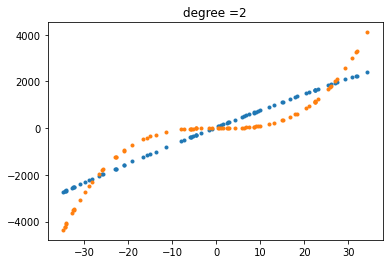

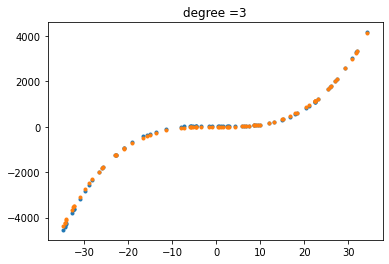

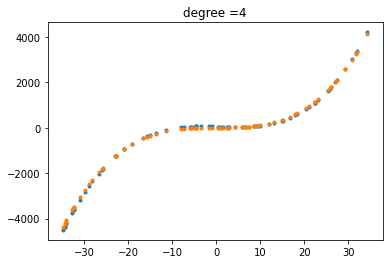

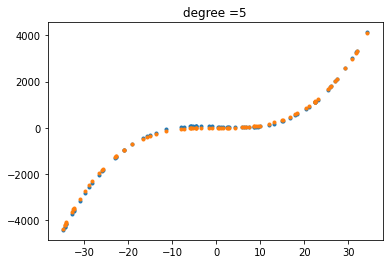

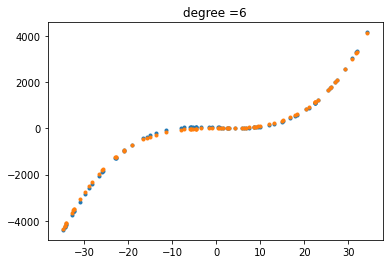

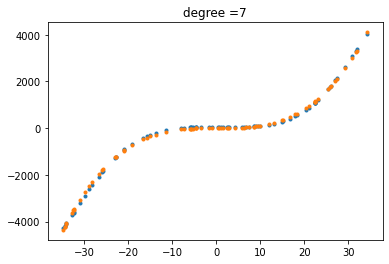

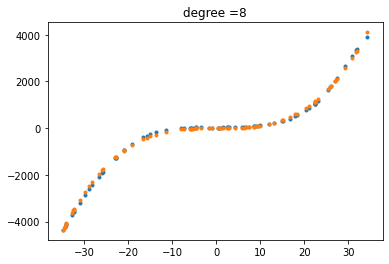

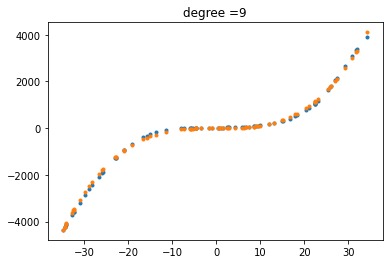

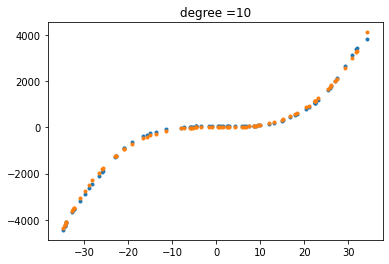

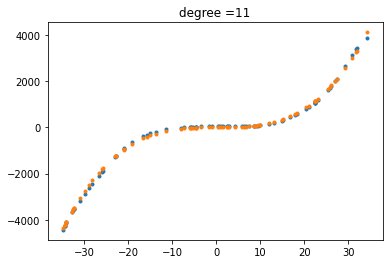

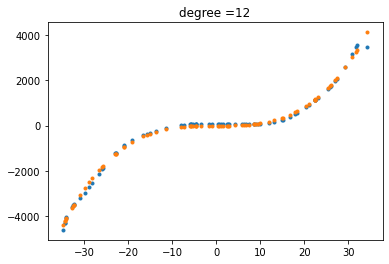

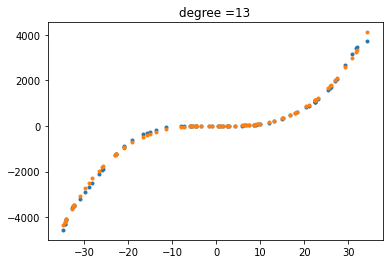

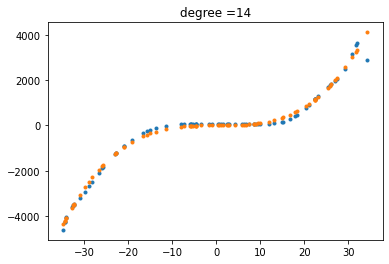

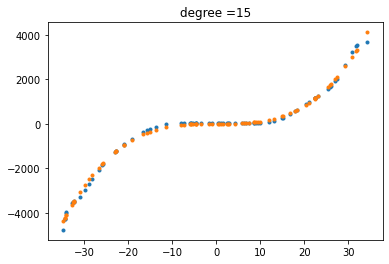

In [43]:
y_pred, y_m = [y_predict], [y_mean] # initialising the arrays with degree=1 values
# array index = deg - 1


for deg in range(2, 16):
    trans = [PolynomialFeatures(deg)]*16
    model = [LinearRegression()]*16
    y = []
    for i in range (0,16):
        x = trans[i].fit_transform(x_train[i])
        x_t = trans[i].transform(x_test)
        model[i].fit(x, y_train[i])
        y.append(model[i].predict(x_t))
    y_pred.append(y)
    y_m.append(np.mean(y, axis=0))
    plt.title('degree =' +str(deg))
    plt.plot(x_test, y_m[deg-1], '.')
    plt.plot(x_test, y_test, '.')
    plt.show()





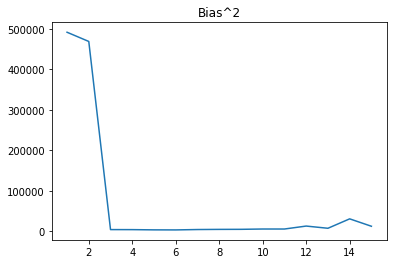

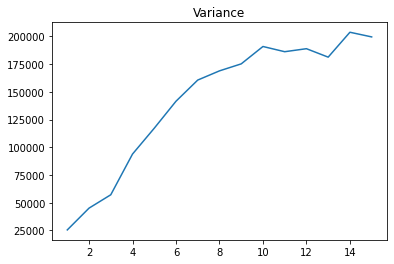

,Bias,Variance
1,700.894,25516.368
2,684.459,45160.109
3,62.042,57213.734
4,61.337,93909.625
5,56.448,117221.451
6,55.220,141558.749
7,63.206,160644.830
8,66.039,168942.681
9,67.113,175245.930
10,72.650,190917.757


In [44]:
# initialise with bias^2 and variance of degree=1
bias_sq, variance = [bias2], [var]

for deg in range(2, 16):
    b2 = calc_bias2(y_test, y_m[deg-1])
    v = calc_var(y_pred[deg-1], y_m[deg-1])
    bias_sq.append(b2)
    variance.append(v)

plt.plot(range(1, 16), bias_sq)
plt.title('Bias^2')
plt.show()
plt.plot(range(1, 16), variance)
plt.title('Variance')
plt.show()

table = pd.DataFrame(np.array([np.sqrt(bias_sq), variance]).T)
table.columns = ['Bias', 'Variance']
table.index = range(1, 16)
table.round(3)

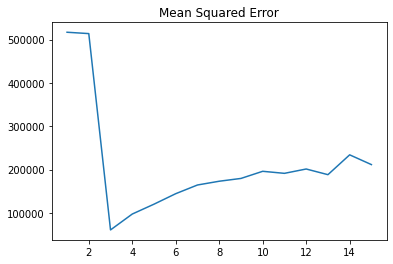

ValueError: Length mismatch: Expected axis has 15 elements, new values have 20 elements

In [45]:
def meansq_error(y, y_cap):
    err = np.array(y) - np.array(y_cap)
    return (np.mean(err**2))

mse = []
for deg in range(1, 16):
    mse.append(meansq_error(y_test, y_pred[deg-1]))
    
plt.plot(range(1, 16), mse)
plt.title('Mean Squared Error')
plt.show()

sigma_2 = np.array(mse) - (np.array(bias_sq) + np.array(variance))

table = pd.DataFrame(sigma_2)
table.columns = ['Irreducible error']
table.index = range(1, 16)
table